<a href="https://colab.research.google.com/github/PrabhakaranD/used-car-price-prediction/blob/main/Used_car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"get2jawa","key":"f5b57fa5433bcfdaf1fbe8d3222d5907"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [3]:
import kaggle

In [4]:
!kaggle datasets download -d avikasliwal/used-cars-price-prediction

  0% 0.00/172k [00:00<?, ?B/s]
100% 172k/172k [00:00<00:00, 50.5MB/s]


In [5]:
! mkdir train

In [6]:
! unzip used-cars-price-prediction.zip -d train

Archive:  used-cars-price-prediction.zip
  inflating: train/test-data.csv     
  inflating: train/train-data.csv    


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('/content/train/train-data.csv')

In [9]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [10]:
import seaborn as sns
import missingno as msno

In [42]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [43]:
X.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN


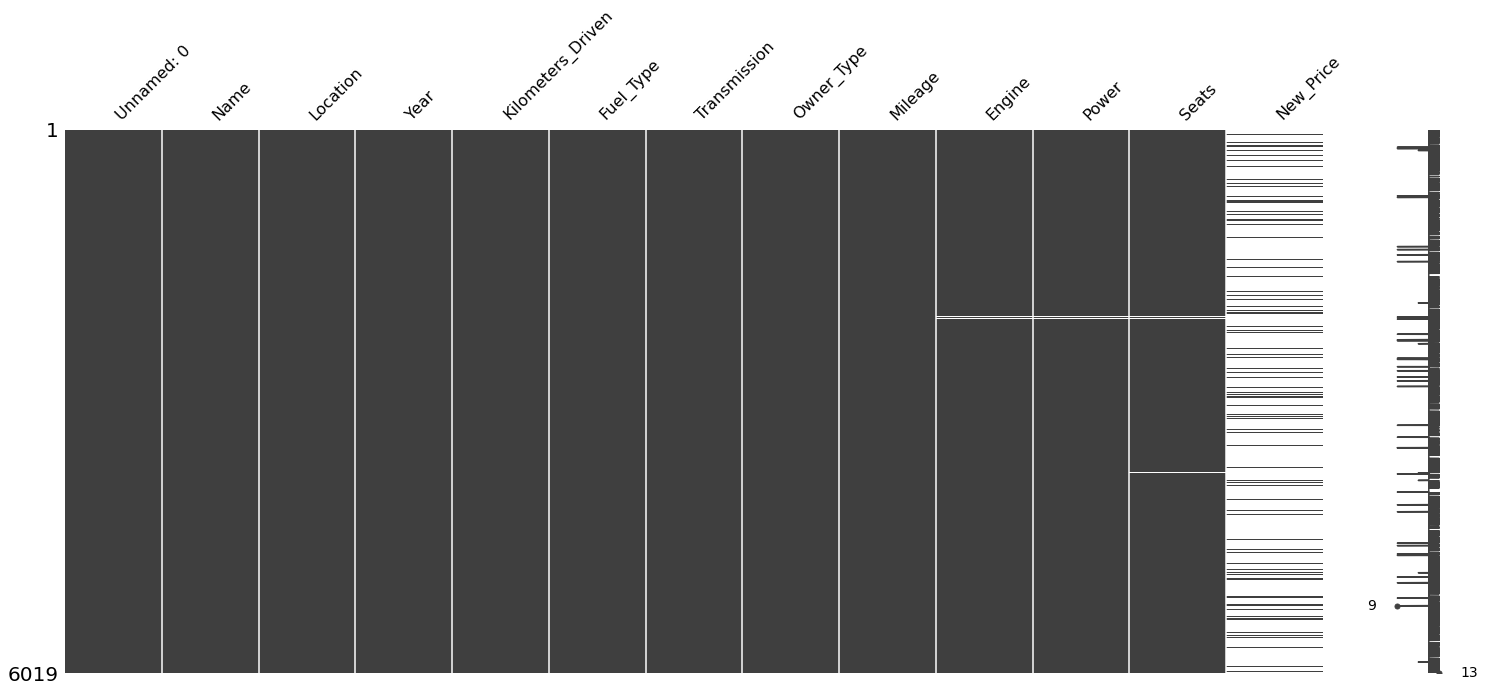

In [44]:
msno.matrix(X)

In [45]:
X = X[X['Mileage'].notna() == True]
X = X[X['Engine'].notna() == True]
X = X[X['Power'].notna() == True]
X = X[X['Seats'].notna() == True]

In [46]:
X = X.drop('New_Price', 1)

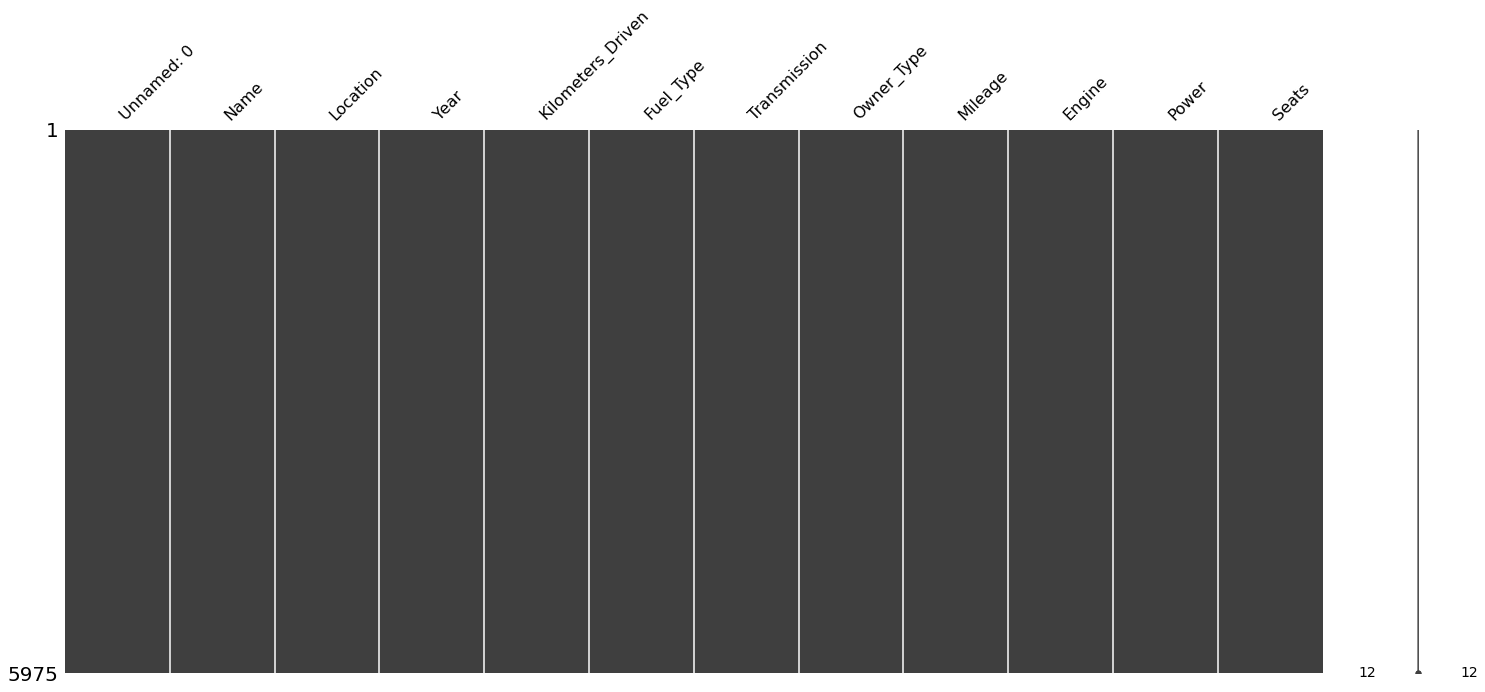

In [47]:
msno.matrix(X)

In [48]:
X.isnull().sum()

Unnamed: 0           0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
dtype: int64

In [51]:
X_backup = X

In [52]:
X

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0


In [61]:
X['Engine'].apply(lambda x:x.str.split(' ').str[0])

AttributeError: ignored

In [59]:
X['Mileage'] = X['Mileage'].str.extract('(\d+.\d+)', expand=False).astype('float')
X['Engine'] = X['Engine'].str.extract('(\d+)', expand=False).astype('int')
X['Power'] = X['Power'].str.extract('(\d+.\d+)', expand=False).astype('float')
X.head()

NameError: ignored

In [37]:
X.shape

(5975, 12)

In [41]:
X[X.Power.isnull() == True]

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
9,9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.30,1248,NaN,5.0
12,12,Maruti Swift VDI BSIV,Jaipur,2015,64424,Diesel,Manual,First,25.20,1248,NaN,5.0
17,17,Maruti Swift DDiS VDI,Jaipur,2017,25000,Diesel,Manual,First,28.40,1248,NaN,5.0
23,23,Hyundai i20 1.2 Magna,Kolkata,2010,45807,Petrol,Manual,First,18.50,1197,NaN,5.0
35,35,Maruti Wagon R LXI BSIII,Jaipur,2009,83816,Petrol,Manual,Second,14.00,1061,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5987,5987,Tata Tiago 1.2 Revotron XT,Kochi,2017,15386,Petrol,Manual,First,23.84,1199,NaN,5.0
5991,5991,Maruti Swift VDI,Hyderabad,2012,68238,Diesel,Manual,First,22.90,1248,NaN,5.0
6004,6004,Hyundai Getz GLE,Coimbatore,2007,66800,Petrol,Manual,First,15.30,1341,NaN,5.0
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248,NaN,5.0


In [1]:
X.head()

NameError: ignored

In [146]:
X['Power'] = X['Power'].str.extract(r'(\d+.\d+)').astype('float')

In [149]:
X['Seats'] = X['Seats'].astype('int')

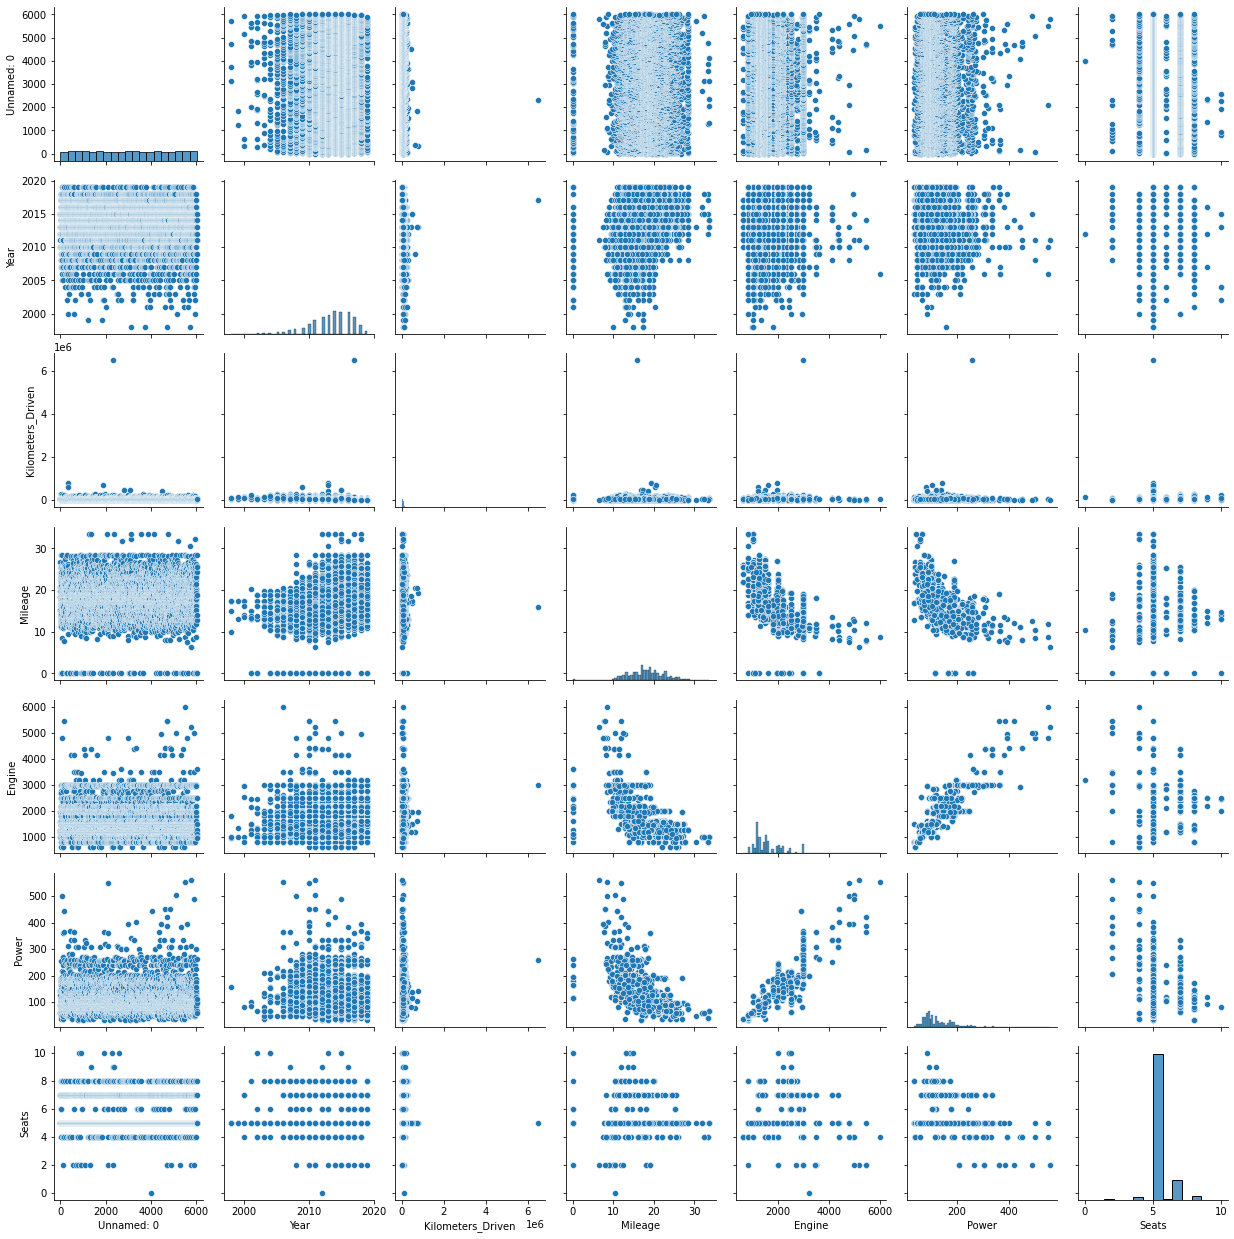

In [153]:
sns.pairplot(X)